In [1]:
import tensorflow as tf

In [2]:

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
! unzip '/content/drive/MyDrive/plant TS.zip'

Archive:  /content/drive/MyDrive/plant TS.zip
   creating: plant TS/test/
   creating: plant TS/test/Basil Juvenile Stage/
  inflating: plant TS/test/Basil Juvenile Stage/5784356_orig_output.jpg  
  inflating: plant TS/test/Basil Juvenile Stage/af46f337e90a3d468af498f87c6d10d0_output.jpg  
  inflating: plant TS/test/Basil Juvenile Stage/basil-leaves-turning-brown-3-783x522_output.jpg  
  inflating: plant TS/test/Basil Juvenile Stage/basil-plant-450x300_output.jpg  
  inflating: plant TS/test/Basil Juvenile Stage/basil-plant-in-pot-1_output.jpg  
  inflating: plant TS/test/Basil Juvenile Stage/growing-basil1_output.jpg  
  inflating: plant TS/test/Basil Juvenile Stage/grow-supermarket-basil-1_output.jpg  
  inflating: plant TS/test/Basil Juvenile Stage/image11_output.jpg  
  inflating: plant TS/test/Basil Juvenile Stage/images48_output.jpg  
  inflating: plant TS/test/Basil Juvenile Stage/images54_output.jpg  
   creating: plant TS/test/Basil Reproductive Stage/
  inflating: plant TS/te

In [5]:


path_train = '/content/plant TS/train'
path_test = '/content/plant TS/test'

In [6]:
image_size = [224,224]

In [7]:
inception = InceptionV3(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

87910968/87910968 [==============================] - 1s 0us/step


In [8]:
inception

In [9]:
folders = glob(r'/content/plant TS/train/*')

In [10]:
folders

['/content/plant TS/train/Cotton Emergence to First Square Stage',
 '/content/plant TS/train/Moringa Fruiting Stage',
 '/content/plant TS/train/Cotton Emergence Stage',
 '/content/plant TS/train/Daffodill Seedling Stage',
 '/content/plant TS/train/Cotton First Flower Stage',
 '/content/plant TS/train/Daffodill Bulb Production Stage',
 '/content/plant TS/train/Chamomile Flowering Stage',
 '/content/plant TS/train/Bell Pepper Fruiting Stage',
 '/content/plant TS/train/Moringa Flowering Stage',
 '/content/plant TS/train/Egg plant Flowering Stage',
 '/content/plant TS/train/Chamomile Bud Formation',
 '/content/plant TS/train/Cotton Flower to Open Boll Stage',
 '/content/plant TS/train/Marigold Germination Stage',
 '/content/plant TS/train/Corn maize Physiological Maturity Stage',
 '/content/plant TS/train/Basil Reproductive Stage',
 '/content/plant TS/train/Tomato Young Seedling stage',
 '/content/plant TS/train/Bell Pepper Vegetative Stage',
 '/content/plant TS/train/Cotton Harvest Ready 

In [11]:
for layer in inception.layers:
    layer.trainable = False
     

In [12]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [13]:
model = Model(inputs = inception.input, outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory(r'/content/plant TS/train',
                                              target_size=(224, 224),
                                              batch_size = 32,
                                              class_mode = 'categorical')
                                          
test_set = test_datagen.flow_from_directory(r'/content/plant TS/test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3247 images belonging to 36 classes.
Found 354 images belonging to 36 classes.


In [16]:
r = model.fit_generator(train_set, 
                        validation_data= test_set, 
                        epochs=5, 
                        steps_per_epoch= len(train_set), 
                        validation_steps = len(test_set))

<ipython-input-16-fc6bc6c318ea>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_set,


Epoch 1/5
102/102 [==============================] - 444s 4s/step - loss: 8.4462 - accuracy: 0.4727 - val_loss: 2.9575 - val_accuracy: 0.7316
Epoch 2/5
102/102 [==============================] - 438s 4s/step - loss: 3.0882 - accuracy: 0.7271 - val_loss: 1.8040 - val_accuracy: 0.8079
Epoch 3/5
102/102 [==============================] - 439s 4s/step - loss: 2.6262 - accuracy: 0.7647 - val_loss: 2.2438 - val_accuracy: 0.8136
Epoch 4/5
102/102 [==============================] - 437s 4s/step - loss: 2.4294 - accuracy: 0.7955 - val_loss: 1.8387 - val_accuracy: 0.8701
Epoch 5/5
102/102 [==============================] - 433s 4s/step - loss: 2.2004 - accuracy: 0.8195 - val_loss: 1.2501 - val_accuracy: 0.9040


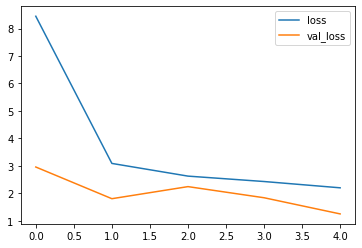

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.savefig('lossVal_loss_inceptionv3')

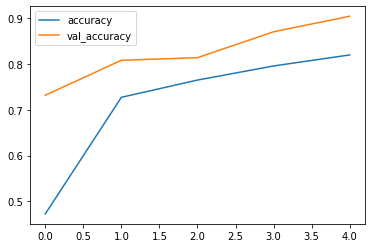

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('acc_val_acc_inceptionv3')
     

In [19]:
y_pred = model.predict(test_set)
y_pred

12/12 [==============================] - 41s 3s/step


array([[3.4356446e-20, 6.9711096e-26, 2.0472247e-13, ..., 0.0000000e+00,
        6.7042564e-33, 7.0311147e-20],
       [7.0024619e-24, 6.6546422e-20, 1.1245748e-04, ..., 5.2469402e-25,
        5.1760884e-10, 4.7322235e-09],
       [1.9222117e-23, 5.3437433e-22, 3.2897968e-16, ..., 4.3172998e-32,
        3.3631894e-24, 4.3696616e-30],
       ...,
       [5.3452333e-14, 3.9805633e-16, 3.8382241e-28, ..., 1.0934584e-27,
        5.1098037e-22, 1.5231432e-23],
       [4.5366241e-32, 1.6674692e-37, 1.4574867e-36, ..., 0.0000000e+00,
        0.0000000e+00, 1.8770249e-38],
       [1.0677635e-24, 1.0571973e-24, 2.3302853e-27, ..., 0.0000000e+00,
        2.0860895e-21, 4.2830315e-25]], dtype=float32)

In [20]:
y_pred.shape

(354, 36)

In [21]:
final_pred = np.argmax(y_pred, axis=1)
final_pred

array([ 5,  5, 19, 19, 27, 17, 11, 27,  6, 16,  4, 10,  3,  8,  6,  9, 16,
        5, 32, 33,  2,  6, 21,  5, 20, 33, 32,  2, 20,  6, 19,  4, 20, 18,
       22, 30, 10,  1, 24, 13, 30,  8,  7, 32, 17, 22, 33, 18, 11, 20, 25,
       29, 23, 17, 12,  0,  7, 23,  5, 21, 31, 29, 23, 21, 10, 26, 18,  1,
        7,  8,  6, 25, 35,  7, 29, 20,  4, 16,  9,  6, 17, 15, 25, 15, 13,
        3, 26, 28, 22, 26, 35, 24, 31, 24, 33, 29,  2, 25, 28, 33, 24, 10,
        8, 12, 16, 14, 10, 12, 31,  2, 10, 19,  4,  6, 31, 17,  0,  0, 30,
       18, 12,  8, 30,  5, 35, 17,  3,  4, 17, 23,  6, 12, 14, 29, 23, 23,
        6,  6,  5,  2, 32, 20, 15,  3, 21, 33,  3, 26,  9,  7, 19, 28, 24,
       13,  8, 24,  7, 26,  6, 15,  8, 17,  8, 12,  6, 30, 15,  2, 19, 11,
       22, 24,  1, 31, 29, 15,  3,  2, 26,  5, 23,  6, 21, 31,  6, 25,  8,
        0, 30, 27, 10, 28,  7, 14, 29,  9, 14, 25, 23,  9, 13, 26,  9,  0,
       30, 31, 11, 28, 31, 26, 26, 31, 25, 33, 19,  1,  2,  1, 19,  1, 13,
       14, 22, 32,  5, 14

In [22]:
y_pred.shape

(354, 36)

In [14]:
model.save('/content/drive/MyDrive/model_inceptionv3.h5')

In [27]:
from tensorflow.keras.models import load_model

model=load_model('/content/drive/MyDrive/model_inceptionv3.h5')

In [25]:
y_pred = model.predict(test_set)
len(y_pred)

12/12 [==============================] - 44s 4s/step


354

In [26]:
y_pred = model.predict(test_set)
y_pred_fin = np.argmax(y_pred, axis=1)
y_pred_fin

12/12 [==============================] - 39s 3s/step


array([13,  6, 19, 32,  2,  9,  2, 32,  1, 15, 10, 17,  3, 23, 18, 28,  7,
       22,  9,  3, 19, 21,  4, 18, 33, 11, 21, 33, 19, 24, 27, 32,  2, 25,
       26, 10, 15, 28, 14,  9, 25, 27,  6, 15, 31, 29,  0, 31, 32, 33, 12,
       10, 22, 25, 31, 29, 15, 33, 20, 28,  6,  9, 24, 33, 16, 13, 25,  3,
       17, 33, 29, 23, 12,  4, 22,  8,  5,  5, 24, 26, 15, 16,  1, 25, 21,
       26,  9, 24, 30, 31,  5, 18, 23, 29, 23, 24,  6,  7, 33, 20,  5, 17,
       24, 18, 11, 27, 17,  1, 32, 12, 31,  6, 25, 29,  7, 28,  9, 29, 21,
       35, 14,  6, 33, 28, 29, 31,  5, 11, 31, 15, 29,  3, 19,  7, 24, 17,
        8, 21,  0, 19, 14,  5, 25, 31,  8, 31, 21, 14, 13,  3, 33, 23, 20,
        3,  2, 21,  3, 19, 29, 19, 20, 12, 22,  3,  3, 12, 31, 24, 12, 20,
       34, 23, 23,  4,  6,  1, 18, 11,  6, 13,  8, 13, 15, 10, 11, 15, 30,
       35, 30, 16, 11, 35, 21, 31,  8, 32, 15, 19, 14,  5, 10, 18, 22,  0,
       15,  8, 21, 11, 30, 20, 17, 22, 20, 13, 22, 30,  3, 27, 20,  2, 23,
        1,  1, 27, 14,  9